
# <center>Non Linear Regression Analysis</center>
## <center>China's GDP from 1960 to 2014 </center>

If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear. 
Let's learn about non linear regressions and apply an example on python. In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.

### Importing required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Non-Linear Regression China's GDP from 1960 to 2014

For an example, we're going to try and fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [22]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-07-08 12:52:03 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
5  1965  6.970915e+10
6  1966  7.587943e+10
7  1967  7.205703e+10
8  1968  6.999350e+10
9  1969  7.871882e+10

### Plotting the Dataset ###
This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it deaccelerates slightly in the 2010s.

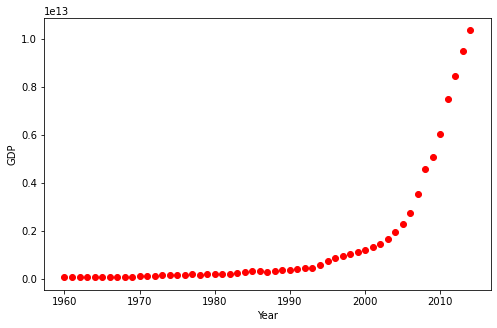

In [25]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model ###

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

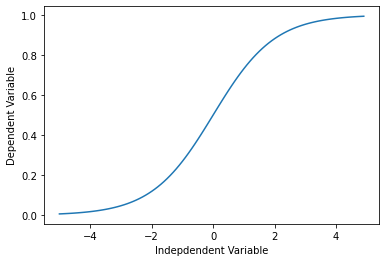

In [26]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model ###
Now, let's build our regression model and initialize its parameters. 

In [27]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:

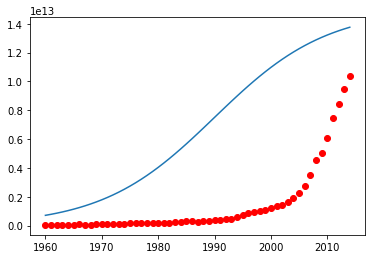

In [28]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [29]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [30]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Now we plot our resulting regresssion model.

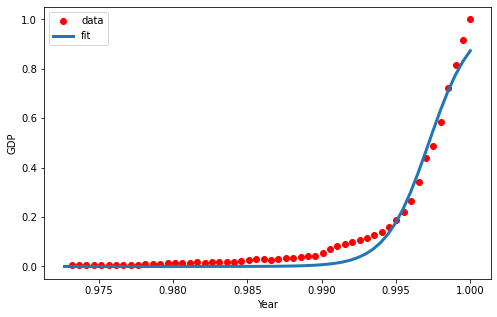

In [31]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Model Evaluation

In [108]:
# Split the data into train and test datasets
from sklearn.model_selection import train_test_split
trainX,testX, trainY, testY= train_test_split(xdata,ydata,test_size=0.1)

In [110]:
popt, pcov = curve_fit(sigmoid, trainX, trainY)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 734.374302, beta_2 = 0.997185


In [98]:
def final_model (x):
    Beta_1 = 834.117302
    Beta_2 = 0.997307
    return  1 / (1 + np.exp(-Beta_1*(x-Beta_2)))

### Plot Training fits

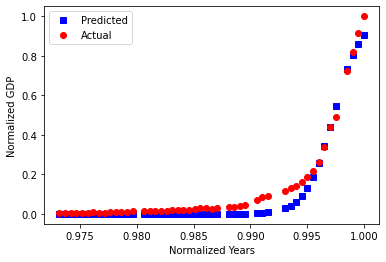

In [118]:
plt.plot(trainX,list(map(final_model,trainX)), 'bs', label='Predicted' )
plt.plot(trainX, trainY,'ro', label='Actual')
plt.xlabel('Normalized Years')
plt.ylabel('Normalized GDP')
plt.legend(loc='best')
plt.show()

## Calculating Accuracy Via R2-scores

In [126]:
from sklearn.metrics import r2_score

yhat=final_model(testX)
R2= r2_score(testY,yhat)
print("R Squared=",R2)

R squared= 0.9032987581341432


## Conclusion

By conclusion, we sigmoid function to fit a nonlinear data distribution og GDB progression of China,. After, fitting the curve using scipy cuve_fit function we get an R squared ratio of more than 90% which considered a good fit.